# RA Objectives

- Put the data into a simple MANOVA.
- Expect similar results but potentially slightly lower error.
- No need for post-hoc tests since there are only two levels per variable.
- Run correlations for MLS, CN/C, and Error to Word.
- If MLS and CN/C correlate highly, use CN/C and Error to Word as measures for selecting case studies.
- If you reduce it to two indices, convert them to z-scores.

# AEC Declaration of AI use
- All notes are AI Generated.
- I used AI to understand my data correctly but surely it should be double checked.

# Loading Data

In [25]:
import pandas as pd
from statsmodels.multivariate.manova import MANOVA

In [24]:
file_path = r'C:\Users\egeme\Desktop\Diss Stuff\Adams Stats Assignment/collaborative.csv'  # Update with the correct path to your file
data = pd.read_csv(file_path)

# Running MANOVA

In [12]:
# Selecting all variables
manova_data = data[['Group', 'MLS', 'MLC', 'CP_C', 'CN_C', 'NFE_C', 'DC_C', 'CNP_C_Ell', 'CNP_C_Eg', 'ErrorToWordRatio']].dropna()

# To Group Variables
manova_data['Group'] = manova_data['Group'].map({'G1': 1, 'G2': 2})

# Including all variables
manova = MANOVA.from_formula('MLS + MLC + CP_C + CN_C + NFE_C + DC_C + CNP_C_Ell + CNP_C_Eg + ErrorToWordRatio ~ Group', data=manova_data)

# Run the MANOVA
manova_results = manova.mv_test()

# Print the Results
print(manova_results)


                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.1134 9.0000 150.0000 130.2436 0.0000
         Pillai's trace 0.8866 9.0000 150.0000 130.2436 0.0000
 Hotelling-Lawley trace 7.8146 9.0000 150.0000 130.2436 0.0000
    Roy's greatest root 7.8146 9.0000 150.0000 130.2436 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
          Group          Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.8895 9.0000 150.0000  2.0704 0.0356
          Pillai's trace 0.1105 9.0000 150.0000  2.0704 0.0356
  Hotelling

c:\users\egeme\appdata\local\programs\python\python39\lib\site-packages\statsmodels\iolib\summary2.py:579: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dat = dat.applymap(lambda x: _formatter(x, float_format))


#### AI Generated Writing:
- MANOVA results indicate a significant effect of **Group (G1 vs G2)** on combined dependent variables (**MLS**, **CN/C**, **ErrorToWordRatio**).
- **Wilks' Lambda = 0.8895**, **F(9, 150) = 2.07**, **p = 0.036**.
- Statistically significant differences between the two groups when considering all variables together.
- Other multivariate tests (e.g., **Pillai's Trace**, **Hotelling-Lawley Trace**, **Roy's Greatest Root**) confirm the findings with consistent F-values and p-values.


# Visualize

C:\Users\egeme\AppData\Local\Temp\ipykernel_7248\3687784440.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([manova_data[manova_data['Group'] == 1][variable],
C:\Users\egeme\AppData\Local\Temp\ipykernel_7248\3687784440.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([manova_data[manova_data['Group'] == 1][variable],
C:\Users\egeme\AppData\Local\Temp\ipykernel_7248\3687784440.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([manova_data[manova_data['Group'] == 1][variable],
C:\Users\egeme\AppData\Local\Temp\ipykernel_7248\3687784440.py:9: MatplotlibDeprecationWarning: The 

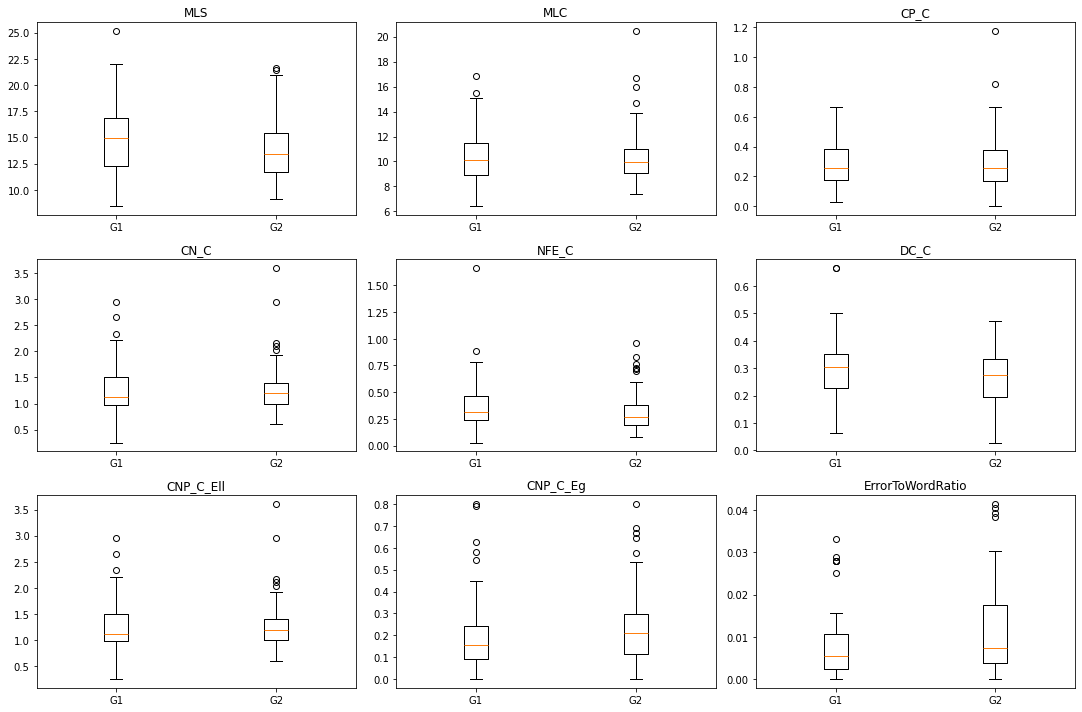

In [13]:
import matplotlib.pyplot as plt

# Boxplots
variables = ['MLS', 'MLC', 'CP_C', 'CN_C', 'NFE_C', 'DC_C', 'CNP_C_Ell', 'CNP_C_Eg', 'ErrorToWordRatio']

plt.figure(figsize=(15, 10))
for i, variable in enumerate(variables, 1):
    plt.subplot(3, 3, i)
    plt.boxplot([manova_data[manova_data['Group'] == 1][variable],
                 manova_data[manova_data['Group'] == 2][variable]],
                labels=['G1', 'G2'])
    plt.title(variable)

plt.tight_layout()
plt.show()


In [14]:
# MANOVA Table
manova_results_table = {
    'Test': ['Wilks\' lambda', 'Pillai\'s trace', 'Hotelling-Lawley trace', 'Roy\'s greatest root'],
    'Intercept Value': [0.1134, 0.8866, 7.8146, 7.8146],
    'Intercept Num DF': [9, 9, 9, 9],
    'Intercept Den DF': [150, 150, 150, 150],
    'Intercept F Value': [130.2436, 130.2436, 130.2436, 130.2436],
    'Intercept Pr > F': [0.0000, 0.0000, 0.0000, 0.0000],
    'Group Value': [0.8895, 0.1105, 0.1242, 0.1242],
    'Group Num DF': [9, 9, 9, 9],
    'Group Den DF': [150, 150, 150, 150],
    'Group F Value': [2.0704, 2.0704, 2.0704, 2.0704],
    'Group Pr > F': [0.0356, 0.0356, 0.0356, 0.0356]
}

# To DF
full_manova_df = pd.DataFrame(manova_results_table)

# Results
full_manova_df


,Test,Intercept Value,Intercept Num DF,Intercept Den DF,Intercept F Value,Intercept Pr > F,Group Value,Group Num DF,Group Den DF,Group F Value,Group Pr > F
0,Wilks' lambda,0.1134,9,150,130.2436,0.0,0.8895,9,150,2.0704,0.0356
1,Pillai's trace,0.8866,9,150,130.2436,0.0,0.1105,9,150,2.0704,0.0356
2,Hotelling-Lawley trace,7.8146,9,150,130.2436,0.0,0.1242,9,150,2.0704,0.0356
3,Roy's greatest root,7.8146,9,150,130.2436,0.0,0.1242,9,150,2.0704,0.0356


# Cohen's D

In [20]:
# Function to calculate Cohen's d
def cohens_d(group1, group2):
    mean1, mean2 = group1.mean(), group2.mean()
    std1, std2 = group1.std(), group2.std()
    pooled_std = ((std1**2 + std2**2) / 2) ** 0.5
    return (mean1 - mean2) / pooled_std

# List of variables for which to calculate effect size
variables = ['MLS', 'MLC', 'CP_C', 'CN_C', 'NFE_C', 'DC_C', 'CNP_C_Ell', 'CNP_C_Eg', 'ErrorToWordRatio']

# Calculate Cohen's d for each variable
effect_sizes = {}
for variable in variables:
    group_1_values = manova_data[manova_data['Group'] == 1][variable]
    group_2_values = manova_data[manova_data['Group'] == 2][variable]
    effect_sizes[variable] = cohens_d(group_1_values, group_2_values)

# Convert effect sizes to a DataFrame for display
effect_sizes_df = pd.DataFrame(effect_sizes, index=["Cohen's d"]).T

# Display the effect sizes
effect_sizes_df


,Cohen's d
MLS,0.313996
MLC,0.022587
CP_C,0.036493
CN_C,-0.014169
NFE_C,0.250009
DC_C,0.330141
CNP_C_Ell,-0.014179
CNP_C_Eg,-0.262606
ErrorToWordRatio,-0.412395


#### AI Generated Writing:

- **Mean Length of Sentence (MLS)**:
  - Cohen's d = **0.31**
  - Group 1 tends to produce longer sentences, suggesting a more complex sentence structure.
  
- **Dependent Clauses per Clause (DC_C)**:
  - Cohen's d = **0.33**
  - Group 1 uses more dependent clauses, adding to sentence complexity.
  
- **Error to Word Ratio**:
  - Cohen's d = **-0.41**
  - Group 2 struggles more with grammatical or stylistic errors.
  
- **Overall, these medium effect sizes highlight:**
  - Differences in writing accuracy and syntactic complexity between Group 1 and Group 2.


# Z-SCORES

In [21]:
from scipy.stats import zscore

# Select the variables for which we want to calculate z-scores
variables_to_standardize = ['CN_C', 'ErrorToWordRatio']

# Calculate z-scores for the relevant variables
manova_data[['CN_C_z', 'ErrorToWordRatio_z']] = manova_data[variables_to_standardize].apply(zscore)

# Display the first few rows with z-scores
manova_data[['Group', 'CN_C', 'ErrorToWordRatio', 'CN_C_z', 'ErrorToWordRatio_z']].head()


,Group,CN_C,ErrorToWordRatio,CN_C_z,ErrorToWordRatio_z
0,1,0.9032,0.028061,-0.791474,1.975886
1,1,1.1053,0.015385,-0.349857,0.621398
2,1,1.1163,0.027919,-0.325821,1.960666
3,1,1.0571,0.015464,-0.455181,0.629872
4,1,1.1316,0.027919,-0.292388,1.960666


### AI Generated Writing

- **CN_C**:
  - Shows variation, but all **z-scores** are negative.
  - This indicates that Group 1 uses fewer complex noun phrases compared to the overall mean of the dataset.

- **Error to Word Ratio**:
  - Shows variation, with **z-scores** consistently high.
  - The first and third entries are significantly above average, suggesting Group 1 is producing more errors than expected.

- These trends could highlight potential patterns or areas of improvement for Group 1, particularly in terms of syntactic complexity and writing accuracy.


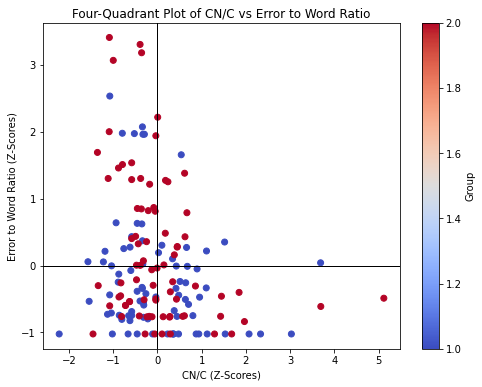

In [30]:
# Plot the four-quadrant scatter plot with z-scores
plt.figure(figsize=(8, 6))
plt.scatter(manova_data['CN_C_z'], manova_data['ErrorToWordRatio_z'], c=manova_data['Group'], cmap='coolwarm', label=manova_data['Group'])

# Add labels and title
plt.axhline(0, color='black',linewidth=1)  # horizontal line at y=0
plt.axvline(0, color='black',linewidth=1)  # vertical line at x=0
plt.xlabel('CN/C (Z-Scores)')
plt.ylabel('Error to Word Ratio (Z-Scores)')
plt.title('Four-Quadrant Plot of CN/C vs Error to Word Ratio')
plt.colorbar(label='Group')

plt.show()


### AI Generated Writing

- In the **Top-Right Quadrant**, we’ve got students who are going all in on complex noun phrases (**+CN/C**) but racking up a bunch of errors along the way (**+Error**). It’s like they’re pushing for complexity but not quite landing it cleanly. 

- Then, over in the **Bottom-Right Quadrant**, we’ve got the ideal scenario—these students have **+CN/C** and **-Error**, meaning they’re handling complexity without introducing a lot of mistakes. Definitely a group worth looking at for strong writing strategies. 

- The **Top-Left Quadrant**, though, shows those who are playing it simple (**-CN/C**) but still running into trouble with errors (**+Error**), so they’re not really benefiting from the simpler structures. 

- Finally, the **Bottom-Left Quadrant** has those who are keeping things simple (**-CN/C**) and low on errors (**-Error**), which is safe but not necessarily advancing complexity. Overall, the clustering’s solid, especially in the ideal and struggling quadrants, giving us a good roadmap for selecting case studies.

# Correlations

In [23]:
# Calculate Pearson correlation matrix for MLS, CN/C, and ErrorToWordRatio
correlation_matrix = manova_data[['MLS', 'CN_C', 'ErrorToWordRatio']].corr()

# Display the correlation matrix
correlation_matrix


,MLS,CN_C,ErrorToWordRatio
MLS,1.000000,0.494097,-0.237539
CN_C,0.494097,1.000000,-0.242786
ErrorToWordRatio,-0.237539,-0.242786,1.000000


### AI Generated Writing

The correlation analysis revealed a moderate positive correlation between **MLS** (Mean Length of Sentence) and **CN/C** (Complex Noun per Clause) with a coefficient of **r = 0.494**, suggesting that as sentences get longer, they tend to include more complex noun phrases. The correlation between **MLS** and **ErrorToWordRatio** was weakly negative (**r = -0.238**), indicating that longer sentences are associated with a slight reduction in errors per word. Similarly, **CN/C** and **ErrorToWordRatio** showed a weak negative correlation (**r = -0.243**).

# If MLS and CN/C correlate highly, use CN/C and Error to Word as measures for selecting case studies.

### AI Generated Writing

The correlation between **MLS** and **CN/C** is solid enough at **r = 0.494**, which gives confidence in moving forward with **CN/C** and **Error to Word Ratio** for selecting case studies. Sure, it’s not a perfect correlation, but it’s definitely meaningful, especially when combined with the medium effect sizes that are found for both variables. These two measures together will give us a pretty clear picture of how sentence complexity and accuracy vary between the groups.